In [1]:
#importing required libraries
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('KNN_Project_Data')

In [4]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [9]:
# feature scaling
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()

In [16]:
sc.fit(df.drop(df.columns[-1],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
df_scaled = sc.transform(df.drop(df.columns[-1],axis=1))

In [20]:
df_scaled

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [22]:
df_scaled = pd.DataFrame(df_scaled,columns=df.columns[:-1])

In [24]:
df_scaled.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [25]:
from sklearn.cross_validation import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df[df.columns[-1]], test_size=0.33, random_state=3)

In [27]:
from sklearn.neighbors import KNeighborsClassifier


In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [30]:
pred = knn.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.74      0.78      0.76       164
          1       0.77      0.72      0.75       166

avg / total       0.75      0.75      0.75       330



In [33]:
print(confusion_matrix(y_test,pred))

[[128  36]
 [ 46 120]]


In [38]:
err = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    err.append(np.mean(y_test-pred))

In [39]:
err

[0.030303030303030304,
 0.16666666666666666,
 0.012121212121212121,
 0.10303030303030303,
 0.015151515151515152,
 0.07575757575757576,
 -0.00909090909090909,
 0.0696969696969697,
 -0.0030303030303030303,
 0.03939393939393939,
 0.0,
 0.024242424242424242,
 -0.015151515151515152,
 -0.00909090909090909,
 -0.01818181818181818,
 -0.0030303030303030303,
 -0.02727272727272727,
 -0.006060606060606061,
 -0.03636363636363636,
 -0.015151515151515152,
 -0.03333333333333333,
 -0.012121212121212121,
 -0.021212121212121213,
 -0.015151515151515152]

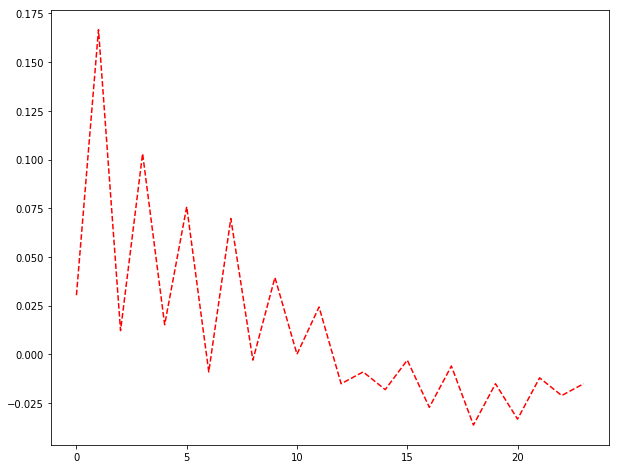

In [40]:
plt.figure(figsize=(10,8))
plt.plot(err,'r--')

In [43]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[130  34]
 [ 25 141]]
             precision    recall  f1-score   support

          0       0.84      0.79      0.82       164
          1       0.81      0.85      0.83       166

avg / total       0.82      0.82      0.82       330



In [44]:
print('The best choice of k value is 17 in this case')

The best choice of k value is 17 in this case
